In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# Voice Gender
Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

# The Dataset
The following acoustic properties of each voice are measured and included within the CSV:

meanfreq: mean frequency (in kHz)

sd: standard deviation of frequency

median: median frequency (in kHz)

Q25: first quantile (in kHz)

Q75: third quantile (in kHz)

IQR: interquantile range (in kHz)

skew: skewness (see note in specprop description)

kurt: kurtosis (see note in specprop description)

sp.ent: spectral entropy

sfm: spectral flatness

mode: mode frequency

centroid: frequency centroid (see specprop)

peakf: peak frequency (frequency with highest energy)

meanfun: average of fundamental frequency measured across acoustic signal

minfun: minimum fundamental frequency measured across acoustic signal

maxfun: maximum fundamental frequency measured across acoustic signal

meandom: average of dominant frequency measured across acoustic signal

mindom: minimum of dominant frequency measured across acoustic signal

maxdom: maximum of dominant frequency measured across acoustic signal

dfrange: range of dominant frequency measured across acoustic signal

modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

label: male or female

In [2]:
#upload the csv file
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


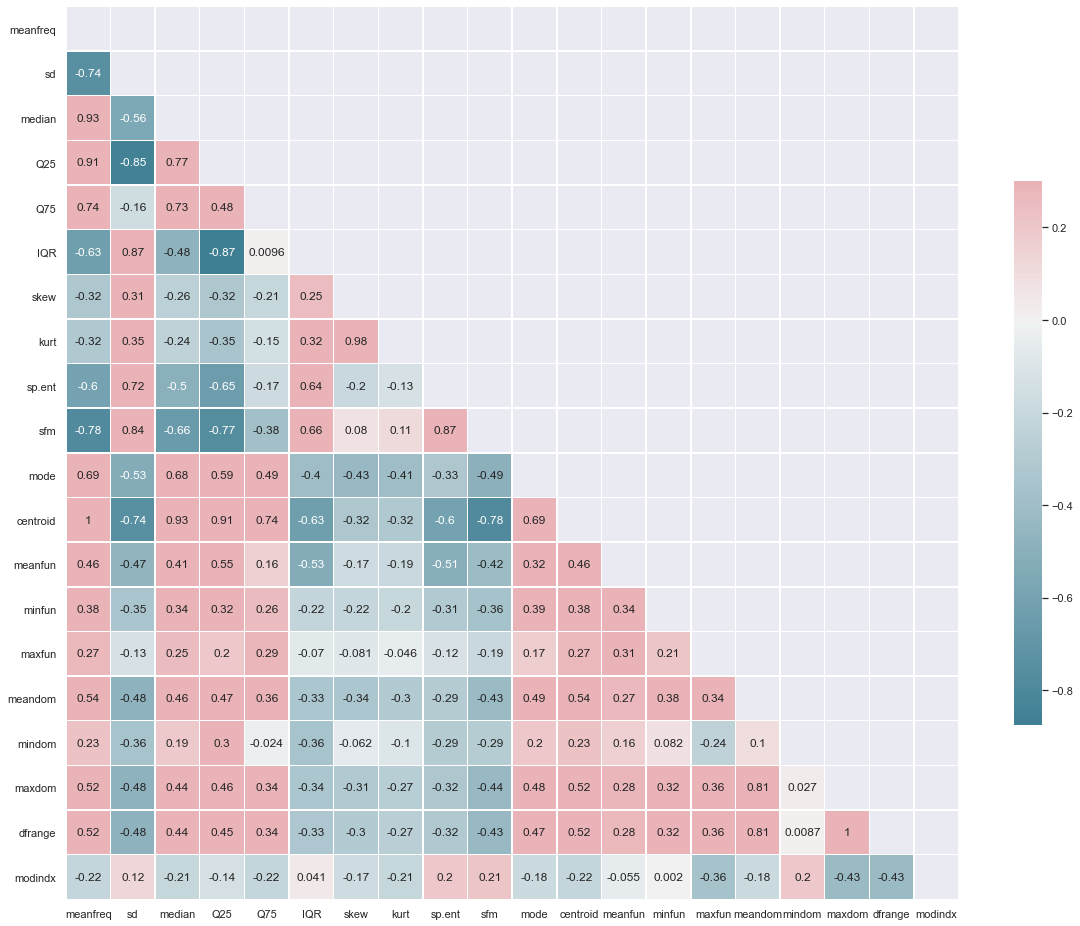

In [3]:
#check correlation between each feature

correlation_matrix = df.corr()

# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="darkgrid")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [4]:
#check for null values
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [6]:
#check shape
df.shape

(3168, 21)

In [7]:
print("Total number of labels: {}".format(df.shape[0]))
print("Number of male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of female: {}".format(df[df.label == 'female'].shape[0]))

Total number of labels: 3168
Number of male: 1584
Number of female: 1584


Thus we can see there are equal number of male and female labels

In [8]:
#Separating features and labels
X=df.iloc[:, :-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [9]:
feature_names = list(X.columns)
feature_names

['meanfreq',
 'sd',
 'median',
 'Q25',
 'Q75',
 'IQR',
 'skew',
 'kurt',
 'sp.ent',
 'sfm',
 'mode',
 'centroid',
 'meanfun',
 'minfun',
 'maxfun',
 'meandom',
 'mindom',
 'maxdom',
 'dfrange',
 'modindx']

In [10]:
# Converting string value to int type for labels

#y=df.iloc[:,-1]

# Encode label category
# male -> 1
# female -> 0

#gender_encoder = LabelEncoder()
#y = gender_encoder.fit_transform(y)
#y

In [11]:
# this will replace "male" with 1.
df['label'].replace(to_replace ="male",
                 value =1, inplace=True)

# this will replace "female" with 0.
df['label'].replace(to_replace ="female",
                 value =0, inplace=True)

In [12]:
y = df['label']

# Data Standardisation
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data.

In [13]:
# Define data standardisation function.

def standardise_data(X_train, X_test):
    
    # Initialise a new scaling object for normalising input data
    sc = StandardScaler() 

    # Set up the scaler just on the training set
    sc.fit(X_train)

    # Apply the scaler to the training and test sets
    train_std=sc.transform(X_train)
    test_std=sc.transform(X_test)
    
    return train_std, test_std

The forward selection method:

- Keeps a list of selected features
- Keeps a list of features still available for selection
- Loops through available features:
    - Calculates added value for each feature (using stratified k-fold validation)
    - Selects feature that adds most value
    - Adds selected feature to selected features list and removes it from available features list
    
This method uses a while loop to keep exploring features until no more are available. An alternative would be to use a for loop with a maximum number of features to select.

In [57]:
# Create list to store accuracies and chosen features
roc_auc_by_feature_number = []
chosen_features = []

# Initialise chosen features list and run tracker
available_features = list(X)
run = 0
number_of_features = len(list(X))

# Loop through feature list to select next feature
while len(available_features)> 0:

    # Track and pront progress
    run += 1
    print ('Feature run {} of {}'.format(run, number_of_features))
    
    # Convert DataFrames to NumPy arrays
    y_np = y.values
    
    # Reset best feature and accuracy
    best_result = 0
    best_feature = ''

    # Loop through available features
    for feature in available_features:

        # Create copy of already chosen features to avoid orginal being changed
        features_to_use = chosen_features.copy()
        # Create a list of features from features already chosen + 1 new feature
        features_to_use.append(feature)
        # Get data for features, and convert to NumPy array
        X_np = X[features_to_use].values
        
        # Set up lists to hold results for each selected features
        test_auc_results = []
    
        # Set up k-fold training/test splits
        number_of_splits = 5
        skf = StratifiedKFold(n_splits = number_of_splits)
        skf.get_n_splits(X_np, y)
    
        # Loop through the k-fold splits
        for train_index, test_index in skf.split(X_np, y_np):
            
            # Get X and Y train/test
            X_train, X_test = X_np[train_index], X_np[test_index]
            y_train, y_test = y[train_index], y[test_index]
    
            # Get X and Y train/test
            X_train_std, X_test_std = standardise_data(X_train, X_test)
    
            # Set up and fit model
            model = SVC(C= 10, gamma= 0.1, degree= 3, kernel= 'rbf')
            model.fit(X_train_std,y_train)
    
            # Predict test set labels
            y_pred_test = model.predict(X_test_std)
            
            # Calculate accuracy of test sets
            accuracy_test = np.mean(y_pred_test == y_test)
          
            # Get ROC AUC
            probabilities = model.decision_function(X_test_std)
            probabilities = probabilities # Probability of 'male'
            fpr, tpr, thresholds = roc_curve(y_test, probabilities)
            roc_auc = auc(fpr, tpr)
            test_auc_results.append(roc_auc)
        
        # Get average result from all k-fold splits
        feature_auc = np.mean(test_auc_results)
    
        # Update chosen feature and result if this feature is a new best
        if feature_auc > best_result:
            best_result = feature_auc
            best_feature = feature
    
    # k-fold splits are complete    
    # Add mean accuracy and AUC to record of accuracy by feature number
    roc_auc_by_feature_number.append(best_result)
    chosen_features.append(best_feature)
    available_features.remove(best_feature)

# Put results in DataFrame
results = pd.DataFrame()
results['feature to add'] = chosen_features
results['ROC AUC'] = roc_auc_by_feature_number

#show results
results

Feature run 1 of 20
Feature run 2 of 20
Feature run 3 of 20
Feature run 4 of 20
Feature run 5 of 20
Feature run 6 of 20
Feature run 7 of 20
Feature run 8 of 20
Feature run 9 of 20
Feature run 10 of 20
Feature run 11 of 20
Feature run 12 of 20
Feature run 13 of 20
Feature run 14 of 20
Feature run 15 of 20
Feature run 16 of 20
Feature run 17 of 20
Feature run 18 of 20
Feature run 19 of 20
Feature run 20 of 20


,feature to add,ROC AUC
0,meanfun,0.987866
1,IQR,0.992497
2,maxdom,0.994310
3,minfun,0.995293
4,sp.ent,0.995400
5,sd,0.995579
6,dfrange,0.995591
7,maxfun,0.995313
8,mindom,0.995584
9,modindx,0.995550


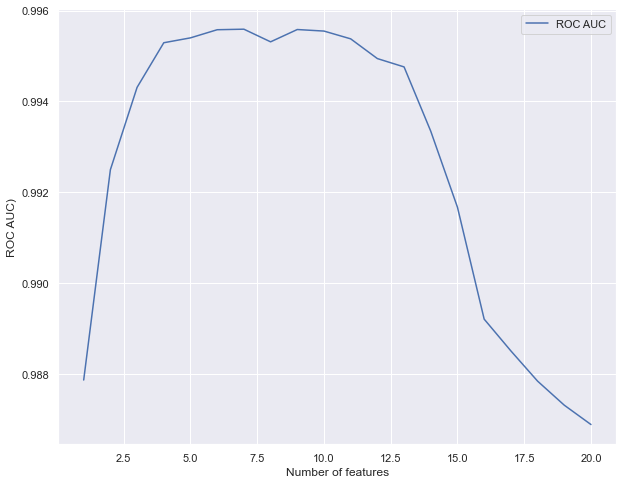

In [58]:
chart_x = list(range(1, number_of_features+1))

plt.figure(figsize=(10,8))

plt.plot(chart_x, roc_auc_by_feature_number,
        label = 'ROC AUC')

plt.xlabel('Number of features')
plt.ylabel('ROC AUC)')
plt.legend()
plt.grid(True)

plt.show()

From the above results it looks like we could use just 6 features in this model. It may also be worth examining the same method using other performance scores (such as simple accuracy, or f1) in place of ROC AUC.

Note that accuracy of the model appears to decline with a greater number of features.

Now using the 7 features let's form our model and obtain the accuracy

In [111]:
#get the 7 features
feats = list(results['feature to add'][0:7])

In [112]:
#standardise
X_new = X[feats]
X_new.head()

,meanfun,IQR,maxdom,minfun,sp.ent,sd,dfrange
0,0.084279,0.075122,0.007812,0.015702,0.893369,0.064241,0.000000
1,0.107937,0.073252,0.054688,0.015826,0.892193,0.067310,0.046875
2,0.098706,0.123207,0.015625,0.015656,0.846389,0.083829,0.007812
3,0.088965,0.111374,0.562500,0.017798,0.963322,0.072111,0.554688
4,0.106398,0.127325,5.484375,0.016931,0.971955,0.079146,5.476562


In [113]:
# Standardise the features
scaler = StandardScaler()
scaler.fit(X_new)
X_new = scaler.transform(X_new)
X_new = pd.DataFrame(X_new, columns=feats)

In [114]:
# Get X and Y train/test

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [115]:
# Set up and fit model
model = SVC(C= 10, degree= 3, gamma= 0.1, kernel= 'rbf')
model.fit(X_train,y_train)

# Accuracy score on test set

pred=model.predict(X_test)
print('accuracy_score for the test data', accuracy_score(pred,y_test))

accuracy_score for the test data 0.9842271293375394


In [116]:
# gridsearchcv results for SVM
# The grid.best_score_ is the average of all cv folds for a single combination of the parameters you specify in the tuned_params.

print('Accuracy test score:',accuracy_score(model.predict(X_test),y_test))
print('Precision score:', precision_score(model.predict(X_test),y_test))

# print classification report
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = model.predict(X_test) 
print(classification_report(y_test, grid_predictions))

Accuracy test score: 0.9842271293375394
Precision score: 0.9792284866468842
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       297
           1       0.99      0.98      0.99       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



Text(21.5, 0.5, 'Predicted label')

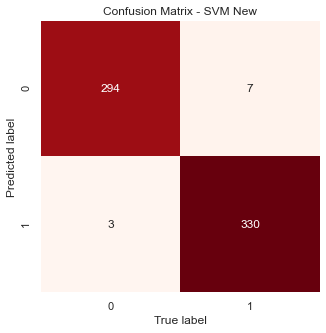

In [117]:
# plot
fig, ax = plt.subplots(1, 1, figsize = (5, 5))

#confusion matrix
y_pred_class = model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cf_matrix.T, cmap = 'Reds',annot=True,fmt = 'd', cbar = False)
ax.set_title('Confusion Matrix - SVM New')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

In [120]:
X_test.shape

(634, 7)

In [119]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'GnBu', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'black', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

Accuracy : 0.9826 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9880 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9792 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9829                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


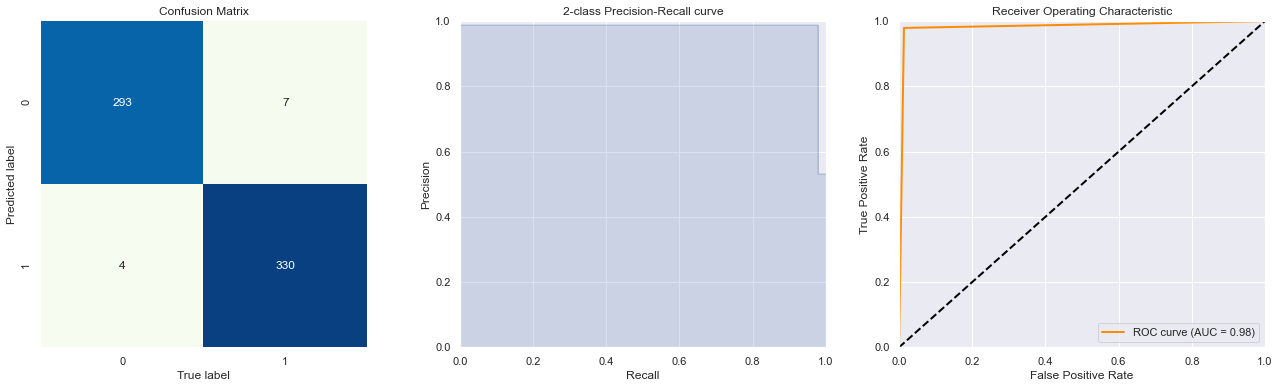

(0.9826498422712934,
 0.9880239520958084,
 0.9792284866468842,
 0.9828802365894354)

In [110]:
#svm-7 features
show_summary_report(y_test, y_pred_class)